In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegressionCV

In [7]:
def load_extra_datasets(N):
    noisy_moons=datasets.make_moons(n_samples=N,noise=0.2)
    return noisy_moons


In [8]:
X,y = load_extra_datasets(200)

In [9]:
X.shape

(200, 2)

In [10]:
y.shape

(200,)

In [12]:
y=y.reshape(1,y.shape[0])

In [13]:
X=X.T

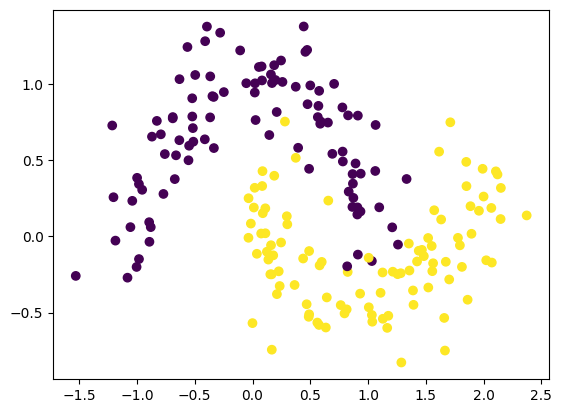

In [16]:
plt.scatter(X[0,:],X[1,:],c=y)

#logistic regression

In [17]:
model=LogisticRegressionCV()
model.fit(X.T,y.T)

/home/pushkar/MLcodes/myenv/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV()

In [24]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

accuracy of Logistic Regression model is: 87.0


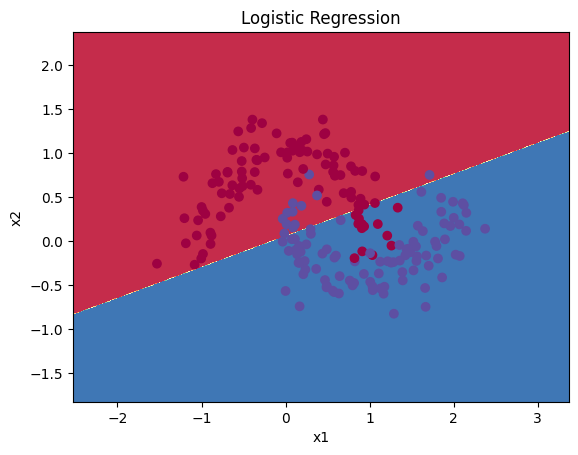

In [26]:
plot_decision_boundary(lambda x: model.predict(x), X, y)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = model.predict(X.T)
print('accuracy of Logistic Regression model is:', sum(sum(LR_predictions == y))/y.shape[1]*100)

##NUERAL NETWORK

In [27]:
def layer_sizes(X,y):
    n_x=X.shape[0]
    n_h=4
    n_y=y.shape[0]
    return (n_x,n_h,n_y)

In [38]:
def init_parameters(n_x,n_h,n_y):
    W1=np.random.randn(n_h,n_x)*0.01
    b1=np.zeros((n_h,1))
    W2=np.random.randn(n_y,n_h)*0.01
    b2=np.zeros((n_y,1))
    parameters={"W1":W1,
                "b1":b1,
                "W2":W2,
                "b2":b2}
    return parameters

In [29]:
def forward_propagation(X,parameters):
    W1=parameters["W1"]
    b1=parameters["b1"]
    W2=parameters["W2"]
    b2=parameters["b2"]
    
    Z1=np.dot(W1,X)+b1
    A1=np.tanh(Z1)
    Z2=np.dot(W2,A1)+b2
    A2=1/(1+np.exp(-Z2))
    
    cache={"Z1":Z1,
           "A1":A1,
           "Z2":Z2,
           "A2":A2}
    return A2,cache

In [30]:
def compute_cost(A2,Y,parameters):
    m=Y.shape[1]
    cost = (-1/m) *(np.dot(Y,np.log(A2).T)+np.dot(1-Y,np.log(1-A2).T))
    cost=float(np.squeeze(cost))
    return cost

In [31]:
def backward_propagation(parameters,cache,X,Y):
    m=X.shape[1]
    W1=parameters["W1"]
    W2=parameters["W2"]
    A1=cache["A1"]
    A2=cache["A2"]
    
    dZ2=A2-Y
    dW2=(1/m)*np.dot(dZ2,A1.T)
    db2=(1/m)*np.sum(dZ2,axis=1,keepdims=True)
    dZ1=np.dot(W2.T,dZ2)*(1-np.power(A1,2))
    dW1=(1/m)*np.dot(dZ1,X.T)
    db1=(1/m)*np.sum(dZ1,axis=1,keepdims=True)
    
    grads={"dW1":dW1,
           "db1":db1,
           "dW2":dW2,
           "db2":db2}
    return grads

In [32]:
def updating_parameters(parameters,grads,learning_rate=1.2):
    W1=parameters["W1"]
    b1=parameters["b1"]
    W2=parameters["W2"]
    b2=parameters["b2"]
    
    dW1=grads["dW1"]
    db1=grads["db1"]
    dW2=grads["dW2"]
    db2=grads["db2"]
    
    W1=W1-learning_rate*dW1
    b1=b1-learning_rate*db1
    W2=W2-learning_rate*dW2
    b2=b2-learning_rate*db2
    
    parameters={"W1":W1,
                "b1":b1,
                "W2":W2,
                "b2":b2}
    return parameters

In [34]:
def nn_model(X,Y,n_h,num_iterations=10000):
    n_x=X.shape[0]
    n_y=Y.shape[0]
    parameters=init_parameters(n_x,n_h,n_y)

    for i in range(0,num_iterations):
        A2,cache = forward_propagation(X,parameters)
        cost=compute_cost(A2,Y,parameters)
        grads=backward_propagation(parameters,cache,X,Y)
        parameters=updating_parameters(parameters,grads)
    return parameters    

In [39]:
parameters = nn_model(X, y, 4, num_iterations=10000)


In [40]:
parameters

{'W1': array([[  3.29423034,   2.11384142],
        [ -2.03865275,  -1.09868551],
        [ -4.28428515,   3.23392751],
        [-10.54463024,   5.26930576]]),
 'b1': array([[-5.58482598],
        [ 1.62246762],
        [ 5.72088084],
        [-2.49879358]]),
 'W2': array([[ 5.97527356,  9.34275509, -8.10400911, -9.97778307]]),
 'b2': array([[2.47084452]])}

In [41]:
def predict(parameters, X):
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5)
    return predictions

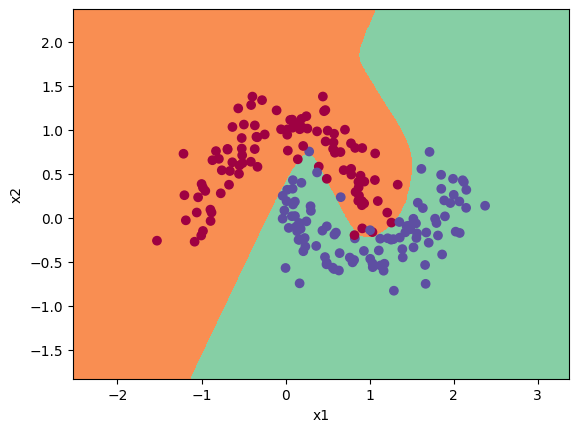

In [42]:
plot_decision_boundary(lambda x: predict(parameters, x.T), X, y)
